In [314]:
#EXPLORATORY DATA ANALYSIS Implementing improvements mentioned

# Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [315]:
# Load the dataset
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
# Description on the data. If we have numerical data the description contains these information for each column
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [318]:
#Find the number of duplicate records
print('train_df - Number of duplicate Record:', df.duplicated().sum())



train_df - Number of duplicate Record: 0


In [319]:
# missing values check
missing_values_count = df.isnull().sum()
print(missing_values_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that we 177 missing 'Age' entries, 687 missing 'Cabin' entries and 2 'Embarked' entries

In [320]:
# Replace cabin NaN with 'zero'
# df['Cabin'] = df['Cabin'].fillna(0)

# Alternative method handling missing values
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [321]:
# Remove the rows with Null values
# df = df.dropna(axis = 0)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


All missing values assigned

What is the most important factor in determing survival in the Titanic
I would say it was gender so will group the dataset by sex and survival

In [322]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

The analysis shows females were more likely to survive. O being died 1 being lived

Were upper-class given preference on life boats as the movie suggests?

In [323]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()



Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Looking at the survived column in the dataset 0 corresponds to died and 1 survive. We can see a greater percentage survived in upper class (>65%)
possible bar graphs

Survived    0    1
Sex               
female     81  233
male      468  109


<Figure size 800x600 with 0 Axes>

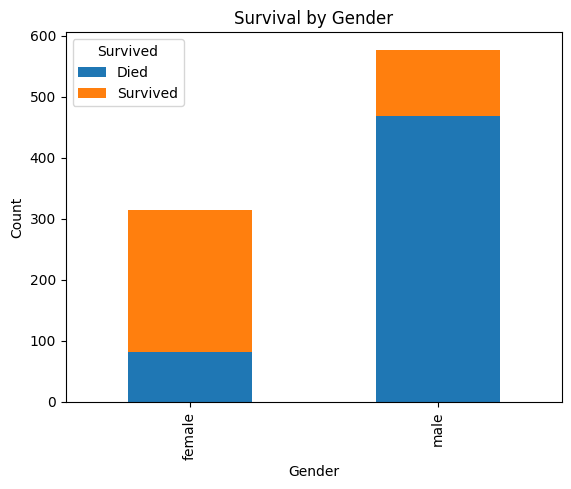

In [324]:
# Analysis survival by Gender
survival_by_gender = df.groupby(['Sex','Survived'])['Survived'].count().unstack()
print(survival_by_gender)

# Plot survival by Gender
# Assigning 0 and to 1 in the legend to text
legend_labels = ['Died', 'Survived']

plt.figure(figsize = (8,6))
survival_by_gender.plot(kind = 'bar',stacked = True)
plt.title("Survival by Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels = legend_labels, title = 'Survived', loc = 'upper left')
plt.show()

Women and child first policy

female and male survival and age 

In [325]:
df.groupby(['Age', 'Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

Survived        0    1
Sex    Child          
female False   66  205
       True    15   28
male   False  449   88
       True    19   21


<Figure size 1000x800 with 0 Axes>

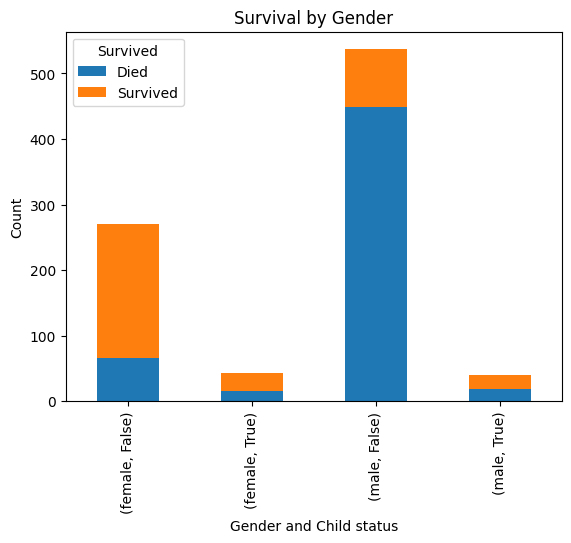

In [326]:
# Analysis: Women and Children first
df['Child'] = df['Age'] < 16
survival_by_gender_age = df.groupby(['Sex','Child','Survived'])['Survived'].count().unstack()
print(survival_by_gender_age)

# Assigning 0 and to 1 in the legend to text
legend_labels = ['Died', 'Survived']

plt.figure(figsize = (10,8))
survival_by_gender_age.plot(kind = 'bar', stacked = True)
plt.title("Survival by Gender")
plt.xlabel('Gender and Child status')
plt.ylabel('Count')
plt.legend(labels = legend_labels, title = 'Survived', loc = 'upper left')
plt.show()

We deduce that non male child 'died' in the highest numbers

Any other dataset observation
What was the most popular port to embark from?


In [327]:
df.groupby(['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

In [328]:
# Detailed visualisation: Count plot for embarked ports, showing the most popular port

Answer Southampton